<a href="https://colab.research.google.com/github/mekasandhyagouri/Brain-tumor-classification/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#get the data from
!wget https://www.dropbox.com/s/dvhuxsim06lt6qe/archive.zip?dl=0

In [ ]:
!unzip /content/archive.zip?dl=0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [ ]:
#count the number of images in the respectve classes 0-Brain Tumour and 1-Healthy
ROOT_DIR = "/content/Training"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)) )
number_of_images.items()

dict_items([('pituitary_tumor', 827), ('meningioma_tumor', 822), ('glioma_tumor', 826), ('no_tumor', 395)])

#We will split the data such that


*   70% for Train Data
*   15% for Validation
*   15% for testing








In [ ]:
def dataFolder(p,split):
  # we will create a train folder

  if not os.path.exists("./" + p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/" + dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) ,
                                  size = (math.floor(split * number_of_images[dir] )-5), replace = False):
        o = os.path.join(ROOT_DIR,dir,img) #path
        D = os.path.join("./"+p,dir)
        shutil.copy(o,D)
        os.remove(o)
  else:
    print("The folder Exists")


In [ ]:
if not os.path.exists("./train"):
    os.mkdir("./train")

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./train/"+ dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) ,
                                  size = (math.floor(60/100 * number_of_images[dir] )-50), replace = False):
        o = os.path.join(ROOT_DIR,dir,img) #path
        D = os.path.join("./train",dir)
        shutil.copy(o,D)
        os.remove(o)
else:
    print("The folder Exists")

In [ ]:
dataFolder("train",0.6)

The folder Exists


In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

Model Build

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization , GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import load_img , img_to_array
import keras

In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size=(3,3), activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Dropout(rate =0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer ='adam',loss= keras.losses.binary_crossentropy,metrics =['accuracy'])

Preparing our data using Data Generator

In [ ]:
def preprocessingImages1(path):
  """
  input: path
  output: pre processed images
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range =0.2, rescale = 1/255, horizontal_flip =True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),batch_size =32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)


Found 1521 images belonging to 4 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input: path
  output: pre processed images
  """
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path,
                                         target_size = (224,224),
                                         batch_size =16, class_mode = 'binary')

  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)


Found 409 images belonging to 4 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)


Found 409 images belonging to 4 classes.


In [ ]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint , EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta =0.01,patience =3,verbose =1, mode="auto")

#model checkpoint

mc = ModelCheckpoint(monitor="val_accuracy", filepath = './bestmodel.h5', verbose=1, save_best_only = True , mode="auto")

cd =[es,mc]

Model Training


In [ ]:
hs = model.fit_generator(generator = train_data, 
                         steps_per_epoch=5,epochs =30,
                         verbose=1,
                         validation_data= val_data, 
                         validation_steps=16,
                         callbacks =cd)

Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: -1858646292037632.0000 - accuracy: 0.3375
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to ./bestmodel.h5
5/5 [==============================] - 5s 1s/step - loss: -1858646292037632.0000 - accuracy: 0.3375 - val_loss: -3495532416729088.0000 - val_accuracy: 0.2500
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: -2592102420578304.0000 - accuracy: 0.2937
Epoch 2: val_accuracy improved from 0.25000 to 0.25781, saving model to ./bestmodel.h5
5/5 [==============================] - 4s 832ms/step - loss: -2592102420578304.0000 - accuracy: 0.2937 - val_loss: -3364621813547008.0000 - val_accuracy: 0.2578
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: -2892326003277824.0000 - accuracy: 0.3250
Epoch 3: val_accuracy improved from 0.25781 to 0.30469, saving model to ./bestmodel.h5
5/5 [==============================] - 4s 834ms/step - loss: -2892326003277824.0000 - accuracy: 0.3

In [ ]:
# Model Graphical Interpretation

history = hs.history
history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

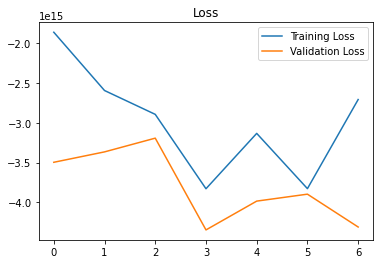

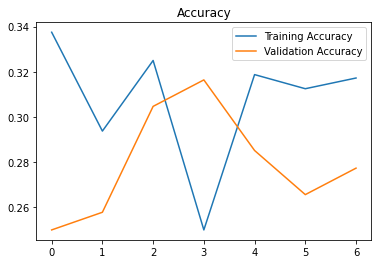

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(train_loss,)

# plt.autoscale()
# plt.plot(h['accuracy'])
# plt.plot(h['val_accuracy'], c='red')

# plt.title("acc vs val-acc")
# plt.show()

def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()




plot_metrics(history)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title("acc vs val-acc")
plt.show()

NameError: ignored

In [ ]:
#Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")



In [ ]:
acc= model.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")


In [ ]:
path = ""

img = 